In [148]:
import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [149]:
dataset = keras.datasets.fashion_mnist.load_data()

(X_train, y_train), (X_test, y_test) = dataset

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [150]:
class_names = [
    "T-Shirt",
    "Trousers",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle Boot",
]

In [151]:
X_train = X_train / 255
X_test = X_test / 255

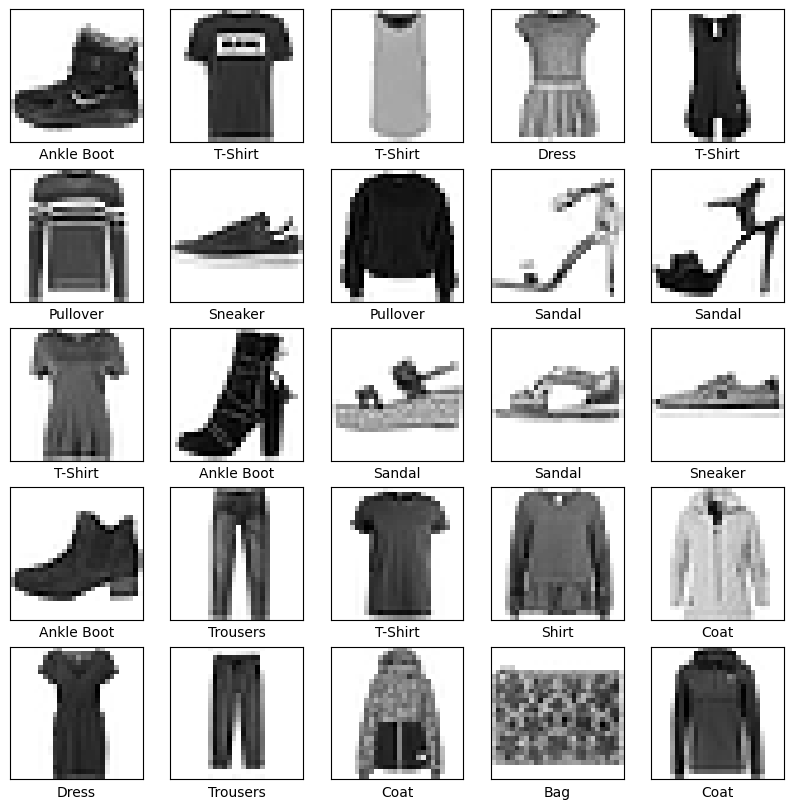

In [152]:
n_rows = 5
n_columns = 5
n_samples = n_rows * n_columns

plt.figure(figsize=(10, 10))

for i in range(n_samples):
    plt.subplot(n_rows, n_columns, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

plt.show()

In [153]:
model = keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(10),
    ]
)

In [154]:
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [155]:
model.compile(optimizer="adam", loss=loss_function, metrics=["accuracy"])

In [156]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4927 - accuracy: 0.8259
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3710 - accuracy: 0.8666
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3343 - accuracy: 0.8765
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3116 - accuracy: 0.8850
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2935 - accuracy: 0.8913


In [157]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
test_loss, test_accuracy

313/313 - 0s - loss: 0.3652 - accuracy: 0.8686 - 416ms/epoch - 1ms/step


(0.36522313952445984, 0.8686000108718872)

In [158]:
probability_model = keras.Sequential(
    [
        model,
        keras.layers.Softmax(),
    ]
)

In [159]:
y_predict_probabilities = probability_model.predict(X_test)
y_predict_probabilities

313/313 [==============================] - 0s 1ms/step


array([[3.5461942e-06, 1.0121786e-08, 3.8043854e-07, ..., 6.5653771e-02,
        1.1568685e-04, 8.9436984e-01],
       [1.8608918e-04, 1.3849653e-10, 9.8362213e-01, ..., 3.5403583e-10,
        4.3980308e-09, 1.2040464e-12],
       [2.2524084e-08, 1.0000000e+00, 4.2431601e-12, ..., 1.1056946e-18,
        3.7866604e-10, 3.8896574e-17],
       ...,
       [7.5558932e-03, 2.7758662e-09, 4.2300019e-04, ..., 5.8999592e-09,
        9.8931152e-01, 1.7022853e-10],
       [2.0532354e-08, 9.9995375e-01, 9.2367308e-11, ..., 1.6309908e-13,
        1.5108572e-08, 5.2956362e-11],
       [8.2851380e-05, 1.1710572e-07, 4.5310400e-05, ..., 7.6561170e-03,
        1.8257769e-03, 2.2181708e-05]], dtype=float32)

In [160]:
y_predict = np.argmax(y_predict_probabilities, axis=1)
y_predict

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [161]:
input_shape = probability_model.get_config()["layers"][0]["config"]["batch_input_shape"]

print(input_shape)

(None, 28, 28)


In [162]:
def predict_image(image: tuple, y_true: int):
    y_true_label = class_names[y_true]

    y_predict_probabilities = probability_model.predict(image.reshape((1, 28, 28)))[0]
    y_predict = np.argmax(y_predict_probabilities)
    y_predict_label = class_names[y_predict]

    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 5), width_ratios=(1, 3))

    ax0.imshow(image, cmap=plt.cm.binary)
    ax0.set(
        xticks=[],
        yticks=[],
        xlabel=f"{round(y_predict_probabilities[y_predict] * 100)}% {y_predict_label} ({y_true_label})",
    )

    ax1.bar(
        x=class_names,
        height=y_predict_probabilities,
        color=np.where(
            np.arange(len(y_predict_probabilities)) == y_true, "green", "red"
        ),
    )
    ax1.set(ylim=(0, 1))

1/1 [==============================] - 0s 20ms/step


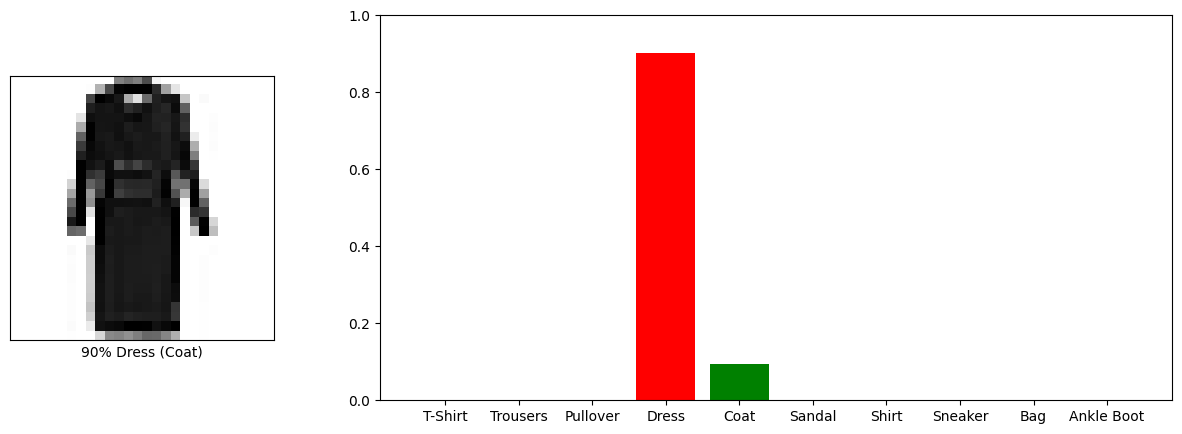

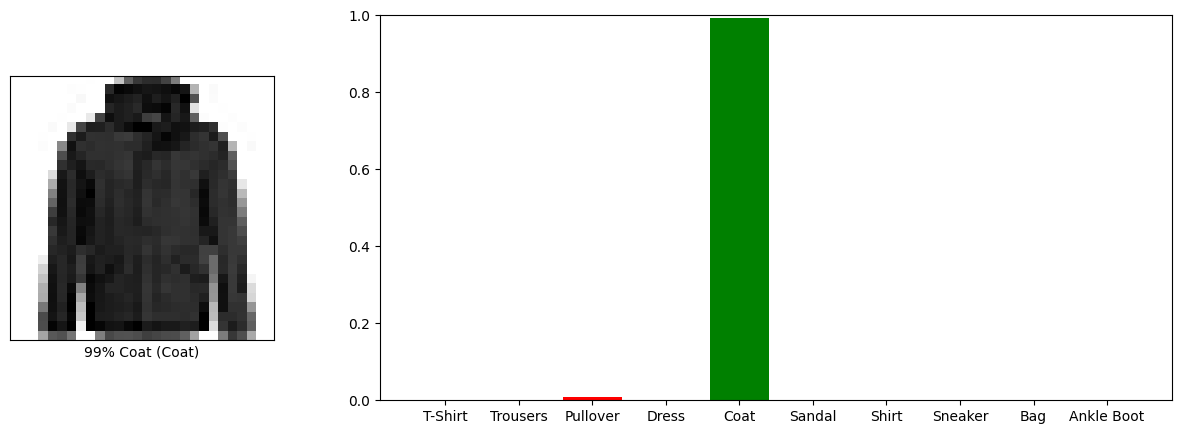

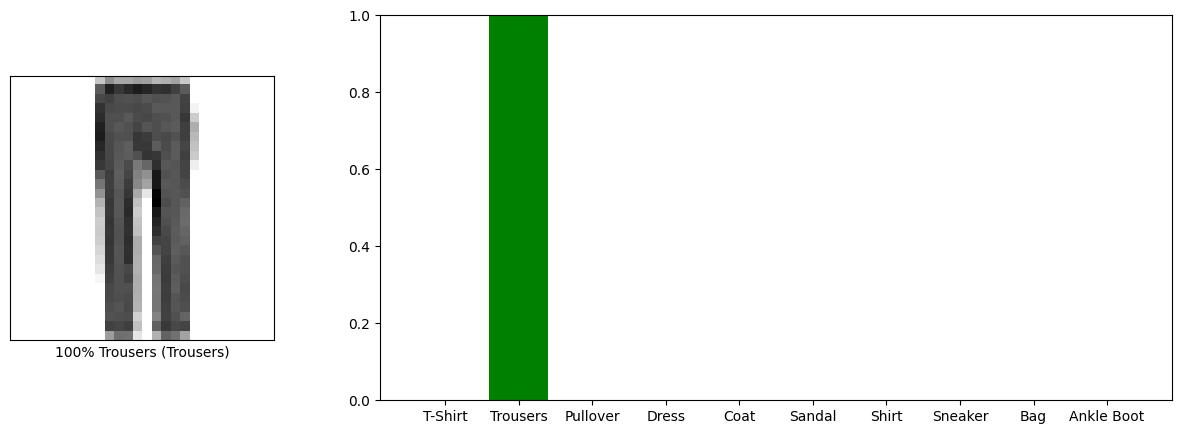

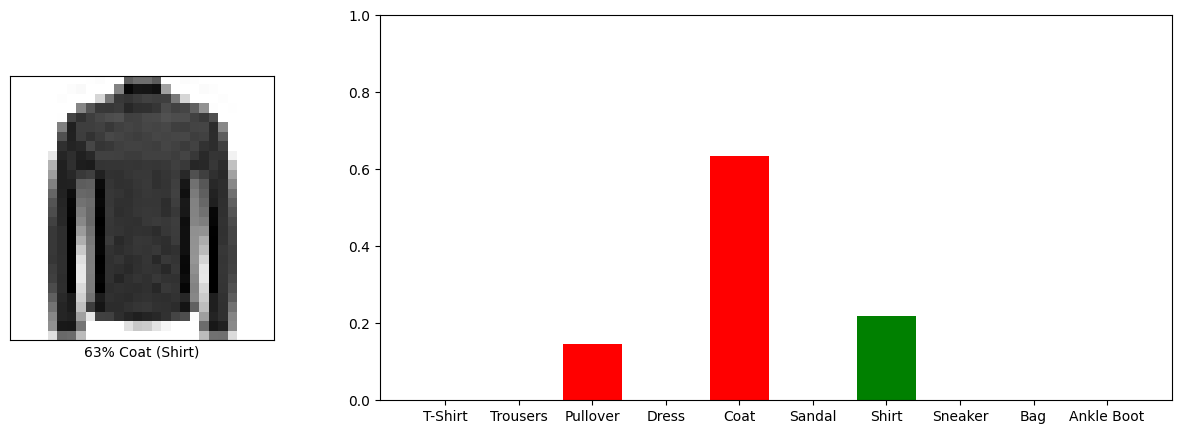

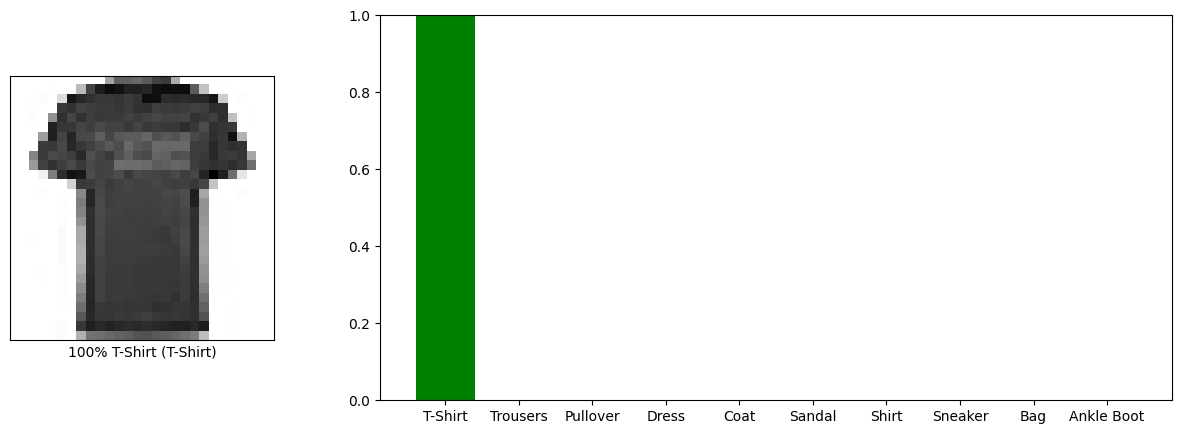

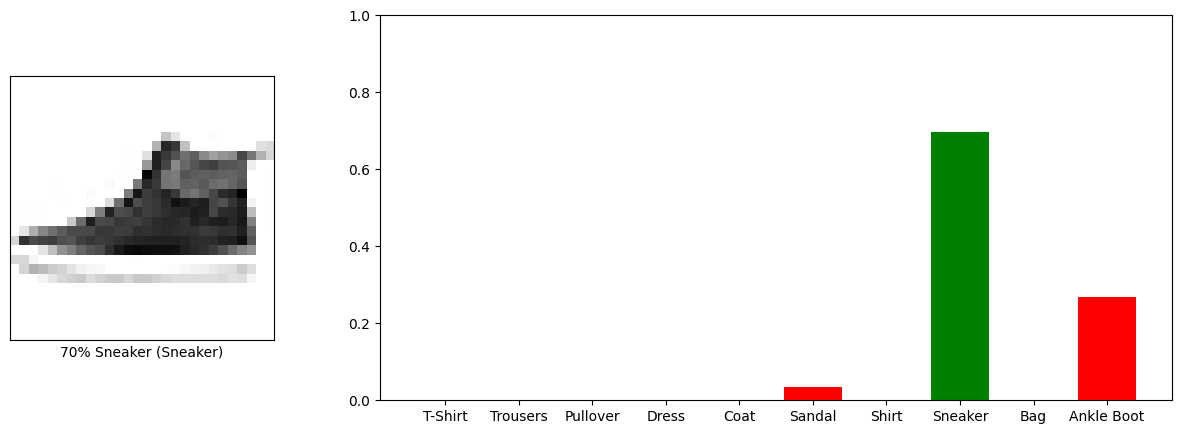

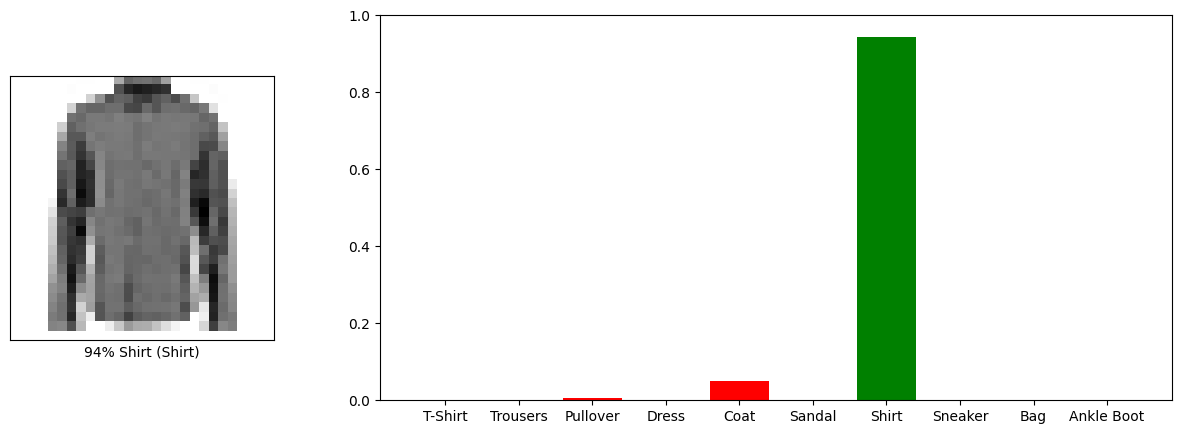

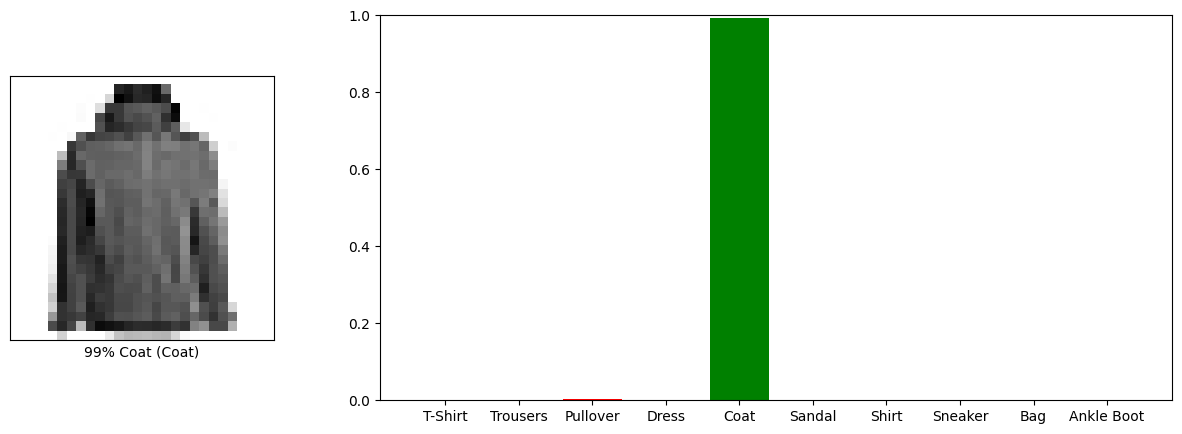

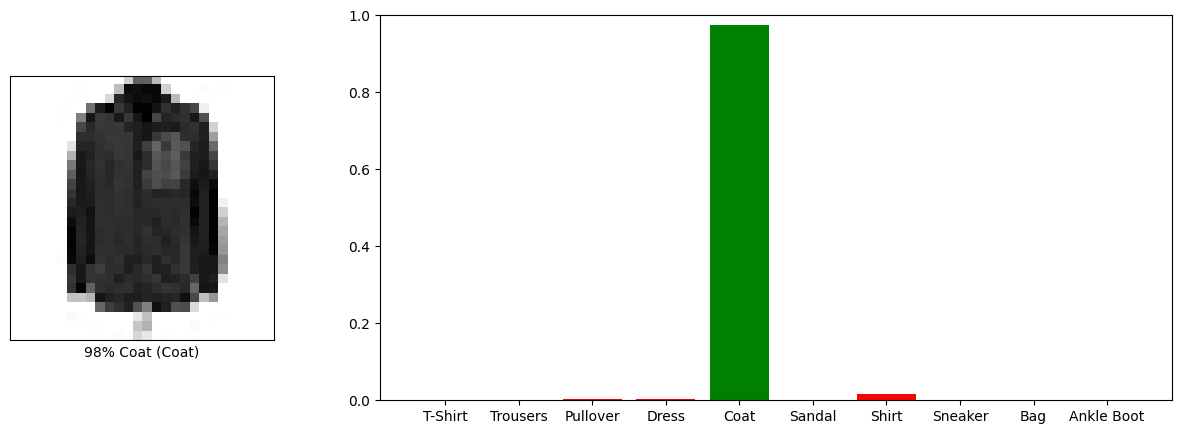

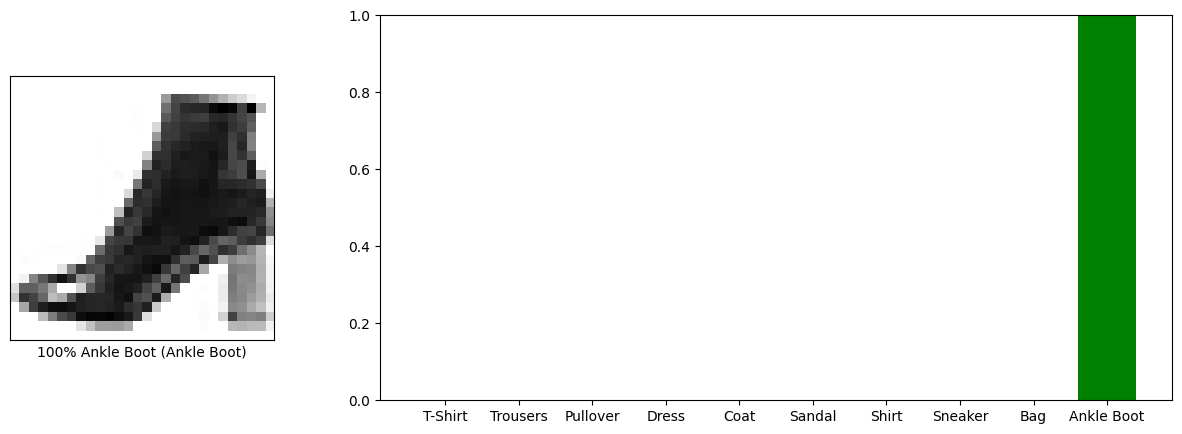

In [163]:
sample_indexes = np.arange(len(y_test))
np.random.shuffle(sample_indexes)

for index in sample_indexes[:10]:
    predict_image(X_test[index], y_test[index])